In [22]:
import numpy as np
import numpy.random as npr
import numpy.linalg as npl
import scipy as sp
import scipy.integrate as spi
import scipy.linalg as spl
import scipy.stats as sps
import scipy.optimize as spo
import matplotlib.pyplot as plt
from scipy.stats import unitary_group
from scipy.linalg import expm
from scipy.linalg import logm
from scipy.special import erf

# Diffusion decision model with discrete output

In [24]:
def Sigma(f, t, A):
    return t * f**2 / A

def P_phi_plus1(theta, f, x0, A, t):
    """P(Phi=+1)"""
    arg = (f * t - theta + x0) / (2 * np.sqrt(A * t))
    return 0.5 * erf(arg) + 0.5

def P_phi_0(theta, f, x0, A, t):
    """P(Phi=0)"""
    arg1 = (f * t - theta + x0) / (2 * np.sqrt(A * t))
    arg2 = (f * t + theta + x0) / (2 * np.sqrt(A * t))
    return -0.5 * erf(arg1) + 0.5 * erf(arg2)

def P_phi_minus1(theta, f, x0, A, t):
    """P(Phi=-1)"""
    arg = (f * t + theta + x0) / (2 * np.sqrt(A * t))
    return 0.5 - 0.5 * erf(arg)

def shannon_entropy(prob_dist):
    """
    Calculate the Shannon entropy of a discrete probability distribution.

    Parameters:
    - prob_dist: A discrete probability distribution

    Returns:
    - The Shannon entropy of the distribution
    """
    prob_dist = np.asarray(prob_dist)
    prob_dist = prob_dist[prob_dist > 0]
    entropy = -np.sum(prob_dist * np.log(prob_dist))

    return entropy

def run_case(theta, f, x0, A, t):
    H = shannon_entropy([P_phi_plus1(theta, f, x0, A, t), P_phi_0(theta, f, x0, A, t), P_phi_minus1(theta, f, x0, A, t)])
    S = Sigma(f, t, A)

    P0 = P_phi_0(theta, f, x0, A, t)

    return S + H, (1 - P0)*np.log(2), S, H

# Calculation

In [12]:
theta = 0.0
A = 1
f = 0
t = 10
x0 = 0

fs = np.linspace(0, 0.5)
rs = np.array([(f, *run_case(theta, f, x0, A, t)) for f in fs])

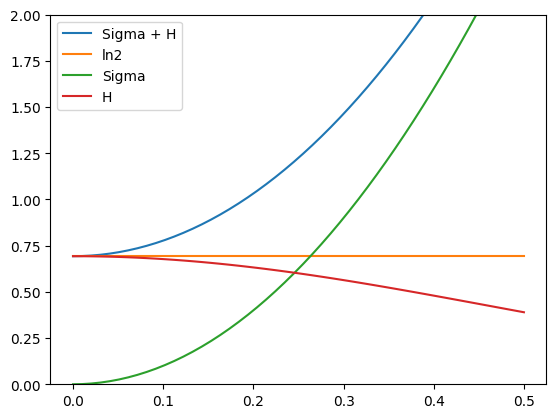

In [14]:
plt.plot(rs[:, 0], rs[:, 1], label='Sigma + H')
plt.plot(rs[:, 0], rs[:, 2], label='ln2')
plt.plot(rs[:, 0], rs[:, 3], label='Sigma')
plt.plot(rs[:, 0], rs[:, 4], label='H')
plt.ylim(0, 2)
plt.legend()

In [17]:
theta = 0.5
A = 1
f = 0
t = 10
x0 = 0

fs = np.linspace(0, 0.5)
rs = np.array([(f, *run_case(theta, f, x0, A, t)) for f in fs])

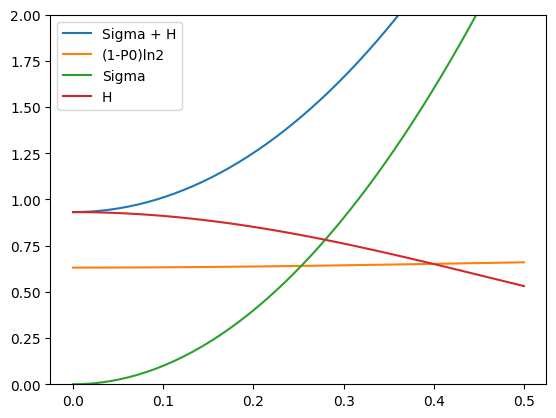

In [18]:
plt.plot(rs[:, 0], rs[:, 1], label='Sigma + H')
plt.plot(rs[:, 0], rs[:, 2], label='(1-P0)ln2')
plt.plot(rs[:, 0], rs[:, 3], label='Sigma')
plt.plot(rs[:, 0], rs[:, 4], label='H')
plt.ylim(0, 2)
plt.legend()

In [20]:
theta = 0.0
A = 1
f = 0.5
x0 = 0

ts = np.linspace(0.001, 10, num=101)
rs = np.array([(t, *run_case(theta, f, x0, A, t)) for t in ts])

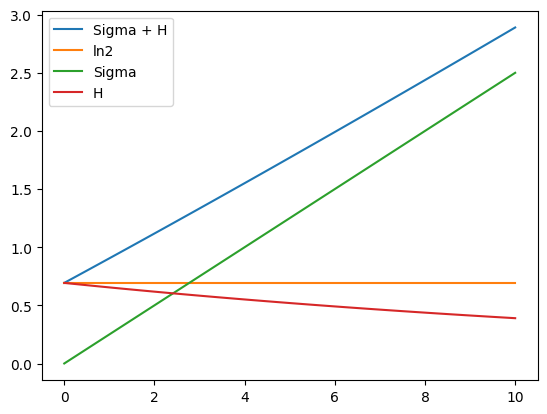

In [21]:
plt.plot(ts, rs[:,1], label='Sigma + H')
plt.plot(ts, rs[:,2], label='ln2')
plt.plot(ts, rs[:,3], label='Sigma')
plt.plot(ts, rs[:,4], label='H')
plt.legend()